# w261 Final Project - Clickthrough Rate Prediction


Team 24   
Vivian Lu, Siddhartha Jakkamreddy, Venky Nagapudi, Luca Garre   
Summer 2019, sections 4 and 5   

## Table of Contents

* __Section 1__ - Question Formulation
* __Section 2__ - Algorithm Explanation
* __Section 3__ - EDA & Challenges
* __Section 4__ - Algorithm Implementation
* __Section 5__ - Course Concepts

# __Section 1__ - Question Formulation

## __Introduction__
Online ad is a multibillion dollar industry fueled by large investments and ever increasing performance goals. Targeted advertisement based on users' browsing industry and demographic, ad features such as overall appearance, employed colors and text, and website features such as ad's relative placement in the webpage, sizes, etc., is receiving more and more interest due to its potential for revenue generation. In this context, machine learning is proving resourceful in the understanding of the features that mostly affect users' Click-Through Rates (CTR) and, based on this understanding, in informing the design of ads that maximize performance metrics such as click and convertion rates. Further, machine learning solutions can easily be deployed in a data pipeline enviroment in order to select and offer, on a user-specific basis, the ad which expectedly maximizes the user's interest. 

...

## __Goal of the analysis__
The purpose of the present analysis is to estimate whether a given ad will be clicked based on a set of features describing the ad. 

...

## __Description of the dataset__
The dataset is provided by __[put_reference_to_CriteoLabs]__ and is composed of three files, a `readme.txt`, a `train.txt` and a `test.txt` file, respectively. The readme file contains a brief description of the data. The `train.txt` and `test.txt` files contain the train and test data. Both files are formatted as tab separated value tables, and amount to 45840617 and 6042135 rows for the train and test data, respectively. Following the description of the data, each row represents an ad and contains the following fields (see commands below, these expect the data to be contained in a data folder inside the current working directory):

- 1 binary field indicating whether the ad has been clicked (1) or not (0). This field is available only for the train data;
- 13 fields containing integer features representing counts;
- 26 categorical features. These are hashed as 32 bits keys for anonymization purposes;

From a printout of the first rows of the data files it appears that the data contain no headers. This implies that, with the sole exception of the first binary field, it is not possible to characterize the various fields in terms of the features these represent. It is also noted that rows in the data can have missing values. This is again noticed when looking at the printed lines, as these have a number of entries which is lower than the number of fields specified in the `readme.txt` file. 

...

In [78]:
#number of rows in the train data
!wc -l data/train.txt

45840617 data/train.txt


In [71]:
#number of rows in the test data
!wc -l data/test.txt

6042135 data/test.txt


In [1]:
# first row of the train data
!head -1 data/train.txt

0	1	1	5	0	1382	4	15	2	181	1	2		2	68fd1e64	80e26c9b	fb936136	7b4723c4	25c83c98	7e0ccccf	de7995b8	1f89b562	a73ee510	a8cd5504	b2cb9c98	37c9c164	2824a5f6	1adce6ef	8ba8b39a	891b62e7	e5ba7672	f54016b9	21ddcdc9	b1252a9d	07b5194c		3a171ecb	c5c50484	e8b83407	9727dd16


In [2]:
# first row of the test data
!head -1 data/test.txt

	29	50	5	7260	437	1	4	14		1	0	6	5a9ed9b0	a0e12995	a1e14474	08a40877	25c83c98		964d1fdd	5b392875	a73ee510	de89c3d2	59cd5ae7	8d98db20	8b216f7b	1adce6ef	78c64a1d	3ecdadf7	3486227d	1616f155	21ddcdc9	5840adea	2c277e62		423fab69	54c91918	9b3e8820	e75c9ae9


# __Section 2__ - Algorithm Explanation

## Logistic regression

Logistic regression belongs to the family of so-called generalized linear models and is by far one of the most known and applied algorithms for the prediction of a target variable $Y$, which represents the possible occurrence of an event of interest $e$. This variable is binary, and usually is encoded such that $Y=1$ represents the occurrence of $e$. More specifically, given a set of explanatory features $X_i$, $i = 1,2, \dots, n$, logistic regression characterizes the probability of occurrence of $e$, $\pi[e] \equiv \pi$, as follows:

\begin{equation}
\pi = \frac{1}{1 + \exp^{-z} }
\end{equation}

where $z = \beta_0 + \sum_{i=1}^n \beta_i X_i$ and $\beta_i$ are model parameters. As can be seen from the equation above, and in compliance with probability rules, $\pi \in (0, 1)$ for any $\beta_i$ and $X_i$, owing to the fact that the exponential function is strictly positive, and considering that the denominator is always higher than the numerator. After some algebraic manipulations an equivalent, and more compact, formulation of the above equation can be obtained as:

\begin{equation}
log\left( \frac{\pi}{1-\pi} \right) = \beta_0 + \sum_{i=1}^n \beta_i X_i
\end{equation}

where the left side is usually referred to as the logit function, $logit(\pi)$, while the right side makes the linear nature of this model explicit. This becomes clearer when considering the decision boundary, i.e., the hypersurface that segments the feature space in positive versus vegative regions. For logistic regression, such boundary is associated with the locus of points in the feature space where $\pi=0.5$, i.e., the model has no preference as to whether a point in this locus should be assigned to the positive or the negative class. Casting $\pi=0.5$ in the left side of the equation above renders a linear equation of the decision boundary in the feature space, in compliance with the linear nature of this model.  

## Log-loss function and parameter estimation

In accordance with established practices in the fields of statistics and machine learning, the parameters $\beta_i$ of the logistic regression model are estimated via maximization of the log-likelihood function. In essence, for a sample of $m$ data points $(x_{ij}, y_j)$, $i = 1,2,\dots,n$, $j = 1,2,\dots,m$, where $x_{ij}$ is the $j$-th record of the $i$-th feature, and $y_j$ is the $j$-th record of the target binary variable $Y$, the parameters $\beta_i$ are estimated such that the log-likelihood function:

\begin{equation}
log\left[ L(\beta_i|y_j) \right] = \frac{1}{m} log\left( \prod_{j = 1}^{m} \pi_j^{y_j} \left( 1-\pi_j \right)^{1-y_j} \right)
\end{equation}

is maximized. The term in the multiplication corresponds to the likelihood function of the Bernoulli distribution for the (degenerate) case of one single trial and number of successes $y_j = 1$ and $y_j = 0$ for success and failure, respectively.

Operationally, the above maximization is usually achieved taking the negative of the log-likelihood function and computing the parameters $\beta_i$ as the argmin of the negated log-likelihood which, after some manipulations, can be written as:

\begin{equation}
\hat{L} = -log\left[ L(\beta_i|y_j) \right] = - \frac{1}{m}\sum_{j=1}^{m} \left[ y_j \cdot log(\pi_j) + (1-y_j) \cdot log(1-\pi_j) \right]
\end{equation}

The right term of the equation, also called Cross-Entropy or log-loss, being a function $\pi$, is ultimately a function of the parameters $\beta_i$ and the features $X_i$ through the logistic regression relationship. The log-loss gives some insights as to the role of this function during estimation of the parameters. Let us assume that for a certain data point, $(x_{ij}, y_j)$, the target variable is equal to $1$. For this given data point, the right term of the equation simplifies to $-log(\pi_j)$. Since this term needs to be minimized, the parameters $\beta_i$ of the model need to be chosen such that $\pi_j$ approaches $1$ as closely as possible. Conversely for an observation $y_j = 0$, minimization of the log-loss, $-log(1 - \pi_j)$, requires $\pi_j$ to approach $0$. This dual role of the log-loss function makes such that likelihood maximization in logistic regression aims to find the set of model parameters which best separate positive from negative observations in the space of the explanatory features $X_i$, in the sense of mapping as closely as possible positive targets to $\pi = 1$ and negative targets to $\pi = 0$. Another appealing property, which turns out to the be of paramount importance for the strategy outlined below, is that this log-loss function is convex, i.e., one and only one point of minimum exists in the space of parameters $\beta_i$.

## Gradient descent

Finding the optimum set of parameters requires a suitable optimization framework. Among various approaches, gradient descent of $`hat{L}$ is a well-established approach for functions. For a certain point of the $n$-th dimensional space of parameters $\beta_i$, the gradient of the log-loss function, $\nabla \hat{L}$ is computed, and thereafter a translation is performed in the parameter space along the gradient direction (the steepest descent).

Gradient descent requires the computation of the gradient. In order to derive its formulation, it is convenient to consider the $i$-th component of $\nabla \hat{L}$, i.e.:

\begin{equation}
\nabla_i \hat{L} = \frac{\partial}{\partial \beta_i} \hat{L}
\end{equation}

Taking the derivative inside the summation and operating on the logarithm yields:

\begin{equation}
\nabla_i \hat{L} = - \frac{1}{m} \sum_{j=1}^{m} \left( \frac{y_j}{\pi_j} - \frac{1-y_j}{1-\pi_j} \right) \frac{\partial \pi_j}{\partial \beta_i}
\end{equation}

The derivative of the probability with respect to the parameter equates to (refer to the initial logistic regression formulation):

\begin{equation}
\frac{\partial \pi_j}{\partial \beta_i} = \frac{\exp^{-z_j}}{(1+\exp^{-z_j})^2} \frac{\partial z_j} {\partial \beta_i} = \frac{\exp^{-z_j}}{1+\exp^{-z_j}} \frac{1}{1+\exp^{-z_j}} \frac{\partial z_j} {\partial \beta_i} = (1-\pi_j) \pi_j \frac{\partial z_j} {\partial \beta_i}
\end{equation}

The derivative of the linear combination term yields:

\begin{equation}
\frac{\partial z_j} {\partial \beta_i} = x_{ij}
\end{equation}

Putting it all together, one finally obtains: 

\begin{equation}
\nabla_i \hat{L} = - \frac{1}{m} \sum_{j=1}^{m} \left[ y_j (1-\pi_j) - (1-y_j) \pi_j \right] x_{ij} = \frac{1}{m}\sum_{j=1}^{m} (\pi_j-y_j) x_{ij}
\end{equation}

for $i = 1,2,\dots,n$. 

Assuming a certain starting point in the space of parameters, $\beta_i^0$, gradient descent first computes the gradient $\nabla \hat{L}$ at this starting point, and shifts the point along the direction of this gradient by computing a new point $\beta_i^1 = \beta_i^0 - \alpha \cdot \nabla \hat{L}$, where $\alpha$ is a learning rate. This is done iteratively until suitable stopping criteria are met.

## Algorithm for scalable implementation of logistic regression

- Assume starting values for logistic parameters $\beta_i^0$
- Set learning parameter $\alpha$
- For each iteration $k$:
- Broadcast parameters $\beta_i^{k}$ to all worker nodes
- Map: emit key-value pairs. Key: index $j$, values: target variable $y_j$ and array of explanatory features $x_{ij}$, for $j = 1,2,\dots,n$
- Map: for every $j = 1,2,\dots,n$ compute probability $\pi_j$ and $\left[ y_j (1-\pi_j) - (1-y_j) \pi_j \right] x_{ij}$
- Reduce: sum over $j$ and divide by $m$, for $i = 1,2,\dots,n$
- Update $\beta_i^{k}$
- Run next iteration

__References:__

Bilder, C.R. and Loughin, T.M. (2015). Analysis of Categorical Data with R. CRC Press. 

Kremonic, Z. (2017). Maximum likelihood and gradient descent demonstration. Blog post. Accessed on July 2019 at https://zlatankr.github.io/posts/2017/03/06/mle-gradient-descent.



Additional resources:

https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html

https://ttic.uchicago.edu/~suriya/website-intromlss2018/course_material/Day3b.pdf 

http://www.holehouse.org/mlclass/06_Logistic_Regression.html


# __Section 3__ - EDA & Challenges

In [1]:
# imports
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from os import path

In [2]:
# store path to notebook
PWD = !pwd
PWD = PWD[0]

In [3]:
# create Spark Session
from pyspark.sql import SparkSession
app_name = "final_project"
master = "local[*]"
spark = SparkSession\
        .builder\
        .appName(app_name)\
        .master(master)\
        .getOrCreate()
sc = spark.sparkContext

In [4]:
# read in sample training data and convert to dataframe
train_sample = sc.textFile('data/sample_training.txt')\
                 .map(lambda x: x.split('\t'))\
                 .toDF().cache()

In [5]:
# head first three rows
train_sample.show(3)

+---+---+---+---+---+-----+---+---+---+---+---+---+---+---+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---+---+--------+--------+--------+--------+---+---+
| _1| _2| _3| _4| _5|   _6| _7| _8| _9|_10|_11|_12|_13|_14|     _15|     _16|     _17|     _18|     _19|     _20|     _21|     _22|     _23|     _24|     _25|     _26|     _27|     _28|     _29|     _30|     _31|     _32|_33|_34|     _35|     _36|     _37|     _38|_39|_40|
+---+---+---+---+---+-----+---+---+---+---+---+---+---+---+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---+---+--------+--------+--------+--------+---+---+
|  0|  0|  1|   |  0|16597|557|  3|  5|123|  0|  1|   |  1|8cf07265|7cd19acc|77f2f2e5|d16679b9|4cf72387|fbad5c96|8fb24933|0b153874|a73ee510|0095a535|3617b5f5|9f32b866|428332cf|b2

In [6]:
# convert numeric columns from string to double
convert_cols = ['_1','_2','_3','_4','_5','_6','_7','_8','_9','_10','_11','_12','_13','_14']

for col in convert_cols:
    train_sample = train_sample.withColumn(col, train_sample[col].cast("double"))
train_sample = train_sample.cache()

In [7]:
# head first three rows
train_sample.show(3)

+---+----+---+----+----+-------+-----+----+----+-----+----+---+----+----+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---+---+--------+--------+--------+--------+---+---+
| _1|  _2| _3|  _4|  _5|     _6|   _7|  _8|  _9|  _10| _11|_12| _13| _14|     _15|     _16|     _17|     _18|     _19|     _20|     _21|     _22|     _23|     _24|     _25|     _26|     _27|     _28|     _29|     _30|     _31|     _32|_33|_34|     _35|     _36|     _37|     _38|_39|_40|
+---+----+---+----+----+-------+-----+----+----+-----+----+---+----+----+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---+---+--------+--------+--------+--------+---+---+
|0.0| 0.0|1.0|null| 0.0|16597.0|557.0| 3.0| 5.0|123.0| 0.0|1.0|null| 1.0|8cf07265|7cd19acc|77f2f2e5|d16679b9|4cf72387|fbad5c96|8fb24933|

In [8]:
# estimate click-through rate
num_ct = train_sample.groupBy().sum('_1').collect()[0][0]
num_ct/train_sample.count()

0.2564675003064959

Add plots, discussions, etc. for EDA

# __Section 4__ - Algorithm Implementation

In [9]:
#generate train data for homegrown solution - select only 1000 rows and only numerical features + target 
train_sample_red = train_sample.select(convert_cols).limit(1000)

In [10]:
train_sample_red.show(3)

+---+----+---+----+----+-------+-----+----+----+-----+----+---+----+----+
| _1|  _2| _3|  _4|  _5|     _6|   _7|  _8|  _9|  _10| _11|_12| _13| _14|
+---+----+---+----+----+-------+-----+----+----+-----+----+---+----+----+
|0.0| 0.0|1.0|null| 0.0|16597.0|557.0| 3.0| 5.0|123.0| 0.0|1.0|null| 1.0|
|0.0| 1.0|0.0| 1.0|null| 1427.0|  3.0|16.0|11.0| 50.0| 0.0|2.0| 1.0|null|
|0.0|null|1.0|null|null|23255.0| null| 0.0| 1.0| 73.0|null|0.0|null|null|
+---+----+---+----+----+-------+-----+----+----+-----+----+---+----+----+
only showing top 3 rows



In [11]:
#impute missing values with averages
from pyspark.sql.functions import avg
for col in train_sample_red.columns:
    train_sample_red = train_sample_red.na.fill(round(train_sample_red.na.drop().agg(avg(col)).first()[0],1), [col])

In [12]:
train_sample_red.show(3)

+---+---+---+----+---+-------+-----+----+----+-----+---+---+---+----+
| _1| _2| _3|  _4| _5|     _6|   _7|  _8|  _9|  _10|_11|_12|_13| _14|
+---+---+---+----+---+-------+-----+----+----+-----+---+---+---+----+
|0.0|0.0|1.0|25.3|0.0|16597.0|557.0| 3.0| 5.0|123.0|0.0|1.0|1.4| 1.0|
|0.0|1.0|0.0| 1.0|9.5| 1427.0|  3.0|16.0|11.0| 50.0|0.0|2.0|1.0|11.1|
|0.0|4.3|1.0|25.3|9.5|23255.0|117.0| 0.0| 1.0| 73.0|0.6|0.0|1.4|11.1|
+---+---+---+----+---+-------+-----+----+----+-----+---+---+---+----+
only showing top 3 rows



In [13]:
#cache into rdd
train_sample_red_RDD = train_sample_red.rdd.map(lambda x: (x[0], np.array(x[1:]))).cache()

In [26]:
def normalize(dataRDD):
    """
    Scale and center data round mean of each feature.
    Args:
        dataRDD - records are tuples of (y, features_array)
    Returns:
        normedRDD - records are tuples of (y, features_array)
    """
    featureMeans = dataRDD.map(lambda x: x[1]).mean()
    featureStdev = np.sqrt(dataRDD.map(lambda x: x[1]).variance())
    
    ################ YOUR CODE HERE #############
    normedRDD = dataRDD.map(lambda x: (x[0], (x[1] - featureMeans)/featureStdev))
    ################ FILL IN YOUR CODE HERE #############
    
    return normedRDD

In [31]:
# part d - write function to compute loss (FILL IN MISSING CODE BELOW)
def LogLoss(dataRDD, W, regType = None, regParam=0.1):
    """
    Compute log loss function.
    Args:
        dataRDD - each record is a tuple of (y, features_array)
        W       - (array) model coefficients with bias at index 0
        regType - (str) 'ridge' or 'lasso', defaults to None
        regParam - (float) regularization term coefficient defaults to 0.1
    Returns:
        loss - (float) the regularized loss
    """
    # add a bias 'feature' of 1 at index 0
    augmentedData = dataRDD.map(lambda x: (np.append([1.0], x[1]), x[0])).cache()
    
    # add regularization term
    reg_term = 0
    if regType == 'ridge':
        reg_term = regParam*np.linalg.norm(W[1:])
    elif regType == 'lasso':
        reg_term = regParam*np.sum(np.abs(W[1:]))
    
    # compute loss
    loss = augmentedData.map(lambda x: x[1]*np.log(1 + np.exp(-np.dot(x[0], W))) + \
                             (1 - x[1])*(np.dot(x[0], W) + np.log(1 + np.exp(-np.dot(x[0], W))))).sum()\
                            /augmentedData.count()
    
    return loss

In [32]:
def GDUpdate(dataRDD, W, regType = None, regParam=0.1, learningRate = 0.1):
    """
    Perform one regularized gradient descent step/update.
    Args:
        dataRDD - records are tuples of (y, features_array)
        W       - (array) model coefficients with bias at index 0
        regType - (str) 'ridge' or 'lasso', defaults to None
        regParam - (float) regularization term coefficient defaults to 0.1
        learningRate - (float) defaults to 0.1
    Returns:
        new_model - (array) updated coefficients, bias at index 0
    """
    # add a bias 'feature' of 1 at index 0
    augmentedData = dataRDD.map(lambda x: (np.append([1.0], x[1]), x[0])).cache()
    
    # add regularization term
    reg_term = np.zeros(len(W))
    if regType == 'ridge':
        reg_term = np.append(0,2*regParam*W[1:])
    elif regType == 'lasso':
        reg_term = np.append(0,regParam*np.sign(W[1:]))
    
    # compute gradient
    grad = augmentedData.map(lambda x: ((1/(1 + np.exp(-np.dot(x[0], W))) - x[1])*x[0])).sum()/augmentedData.count() + reg_term
    
    #update model parameters
    new_model = W - learningRate*grad
   
    return new_model

In [62]:
def makePrediction(dataRDD, W):
    """
    Perform one regularized gradient descent step/update.
    Args:
        dataRDD - records are tuples of (y, features_array)
        W       - (array) model coefficients with bias at index 0
    Returns:
        pred - (rdd) predicted targets
    """
    # add a bias 'feature' of 1 at index 0
    augmentedData = dataRDD.map(lambda x: (np.append([1.0], x[1]), x[0])).cache()
    
    # compute prediction
    pred = augmentedData.map(lambda x: int((1/(1 + np.exp(-np.dot(x[0], W))))>0.5) )
   
    return pred

In [17]:
# normalize features
normedRDD = normalize(train_sample_red_RDD).cache()

In [81]:
#compute the number of features
numb_features = len(train_sample_red.columns) - 1
#define baseline model, add one parameter representing the intercept
BASELINE = np.random.randn(numb_features + 1)

The estimated model is: [-1.35023326  0.08426254  0.02677127 -0.31839031  0.09025764 -0.53961667
 -0.23534375 -0.35407457 -0.15255719 -0.16315751  0.09803933  0.62629503
 -0.29862719 -0.13441528]
The loss of the estimated model is: 0.5083670379670635




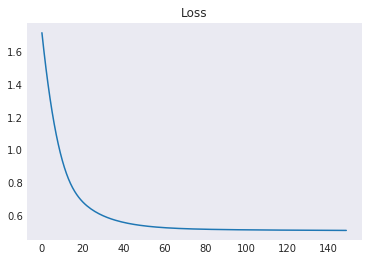

Text(0.5,1,'Norm of vector of parameters')

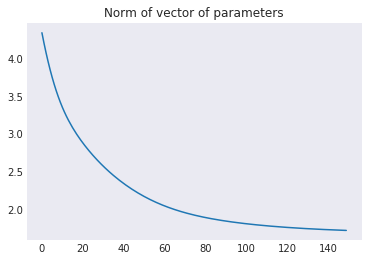

In [82]:
nSteps = 150
learningRate = 0.5
regType = None
regParam = 0.05

Loss_save = []
Model_norm = []
#broadcast model
model = BASELINE #model = sc.broadcast(BASELINE) #substitute this line with the comment when deploying it on the cloud
for idx in range(nSteps):
    #print("----------")
    #print(f"STEP: {idx+1}")
    
    # compute loss
    loss = LogLoss(normedRDD, model, regType=regType, regParam=regParam)
    # update model parameters
    model = GDUpdate(normedRDD, model, regType=regType, regParam=regParam, learningRate=learningRate)
    
    #store results
    Loss_save.append(loss)
    Model_norm.append(np.linalg.norm(model))
    
    #broadcast model
    #model = sc.broadcast(model) #uncomment this line when deploying it on the cloud

print(f"The estimated model is: {model}")
print(f"The loss of the estimated model is: {loss}")
print()
print()
plt.plot(Loss_save)
plt.title('Loss')
plt.show()
plt.plot(Model_norm)
plt.title('Norm of vector of parameters')

In [89]:
print(f'number of true positives is {normedRDD.map(lambda x: x[0]).sum()}')
res = makePrediction(normedRDD, model).cache()
print(f'number of predicted positives is {res.sum()}')

number of true positives is 234.0
number of predicted positives is 30


# __Section 5__ - Course Concepts

### TOY EXAMPLE - comparison with ScikitLearn

In [73]:
#TOY EXAMPLE STARTS HERE
numb_features = 2

N = 100
D = 3

X_toy = np.random.randn(N,D)

# center the first 50 points at (-1,-1)
X_toy[:50,:] = X_toy[:50,:] - 1*np.ones((50,D))

# center the last 50 points at (2, 2)
X_toy[50:,:] = X_toy[50:,:] + 2*np.ones((50,D))

X_toy[:50,0] = 0
X_toy[50:,0] = 1

rdd1 = sc.parallelize(X_toy)
rdd1 = rdd1.map(lambda x: [float(i) for i in x])
toy_sample_red = rdd1.toDF(["_1", "_2", "_3"])
toy_sample_red_RDD = toy_sample_red.rdd.map(lambda x: (x[0], x[1:])).cache()

In [74]:
#define baseline model, add one parameter representing the intercept
BASELINE = np.random.randn(numb_features + 1)

The estimated model is: [-0.92020023  0.93439328  0.84967564]
The loss of the estimated model is: 0.10855782140995121




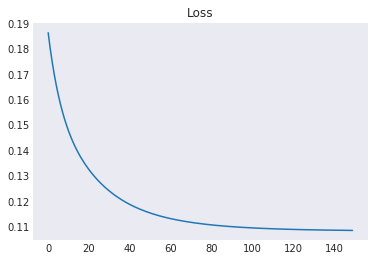

Text(0.5,1,'Norm of vector of parameters')

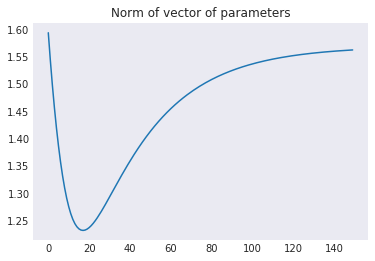

In [75]:
nSteps = 150
learningRate = 0.5
regType = 'ridge'
regParam = 0.05

Loss_save = []
Model_norm = []
#broadcast model
model = BASELINE
for idx in range(nSteps):
    #print("----------")
    #print(f"STEP: {idx+1}")
    
    # compute loss
    loss = LogLoss(toy_sample_red_RDD, model, regType=regType, regParam=regParam)
    # update model parameters
    model = GDUpdate(toy_sample_red_RDD, model, regType=regType, regParam=regParam, learningRate=learningRate)
    
    #store results
    Loss_save.append(loss)
    Model_norm.append(np.linalg.norm(model))

print(f"The estimated model is: {model}")
print(f"The loss of the estimated model is: {loss}")
print()
print()
plt.plot(Loss_save)
plt.title('Loss')
plt.show()
plt.plot(Model_norm)
plt.title('Norm of vector of parameters')

In [80]:
#actual simulated value is 50
res = makePrediction(toy_sample_red_RDD, model).cache()
res.sum()

49

In [78]:
import sklearn
from sklearn.linear_model import LogisticRegression
X, y = X_toy[:,1:],X_toy[:,0]
clf = LogisticRegression(random_state=0, solver='lbfgs',fit_intercept=True).fit(X, y)
print(clf.coef_, clf.intercept_)

[[1.8467605  1.53902583]] [-1.93030304]


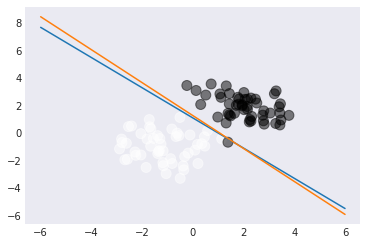

In [79]:
plt.scatter(X_toy[:,1], X_toy[:,2], c=X_toy[:,0], s=100, alpha=0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -(model[0] + x_axis*model[1]) / model[2]
plt.plot(x_axis, y_axis)
y_axis = -(clf.intercept_+x_axis*clf.coef_[0][0]) / clf.coef_[0][1]
plt.plot(x_axis, y_axis)
plt.show()

In [78]:
convert_cols = ['_1','_2','_3','_4','_5','_6','_7','_8','_9','_10','_11','_12','_13','_14']

In [80]:
#generate train data for homegrown solution - select only 1000 rows and only numerical features + one categorical variable +target 
train_sample_red = train_sample.select(convert_cols + ['_23']).limit(1000)

In [81]:
train_sample_red.show(3)

+---+----+---+----+----+-------+-----+----+----+-----+----+---+----+----+--------+
| _1|  _2| _3|  _4|  _5|     _6|   _7|  _8|  _9|  _10| _11|_12| _13| _14|     _23|
+---+----+---+----+----+-------+-----+----+----+-----+----+---+----+----+--------+
|0.0| 0.0|1.0|null| 0.0|16597.0|557.0| 3.0| 5.0|123.0| 0.0|1.0|null| 1.0|a73ee510|
|0.0| 1.0|0.0| 1.0|null| 1427.0|  3.0|16.0|11.0| 50.0| 0.0|2.0| 1.0|null|a73ee510|
|0.0|null|1.0|null|null|23255.0| null| 0.0| 1.0| 73.0|null|0.0|null|null|a73ee510|
+---+----+---+----+----+-------+-----+----+----+-----+----+---+----+----+--------+
only showing top 3 rows



In [83]:
#impute missing values with averages
from pyspark.sql.functions import avg
for col in convert_cols:
    train_sample_red = train_sample_red.na.fill(round(train_sample_red.na.drop().agg(avg(col)).first()[0],1), [col])

In [91]:
from pyspark.sql.functions import col, split
df = train_sample_red.withColumn("_23", split(col("_23")," "))
df.show(3)

+---+---+---+----+---+-------+-----+----+----+-----+---+---+---+----+----------+
| _1| _2| _3|  _4| _5|     _6|   _7|  _8|  _9|  _10|_11|_12|_13| _14|       _23|
+---+---+---+----+---+-------+-----+----+----+-----+---+---+---+----+----------+
|0.0|0.0|1.0|25.3|0.0|16597.0|557.0| 3.0| 5.0|123.0|0.0|1.0|1.4| 1.0|[a73ee510]|
|0.0|1.0|0.0| 1.0|9.5| 1427.0|  3.0|16.0|11.0| 50.0|0.0|2.0|1.0|11.1|[a73ee510]|
|0.0|4.3|1.0|25.3|9.5|23255.0|117.0| 0.0| 1.0| 73.0|0.6|0.0|1.4|11.1|[a73ee510]|
+---+---+---+----+---+-------+-----+----+----+-----+---+---+---+----+----------+
only showing top 3 rows



In [95]:
from pyspark.ml.feature import CountVectorizer
cat_Vectorizer = CountVectorizer(inputCol="_23", outputCol="_23_array", vocabSize=4, minDF=1.0)

In [96]:
catVectorizer_model = cat_Vectorizer.fit(df)

In [97]:
df_ohe = catVectorizer_model.transform(df)

In [ ]:
StringIndexer(inputCols=["gender"], outputCols=["gender_numeric"])

### Cardinality of categorical variables

In [57]:
# number of unique categorical values
from pyspark.sql.functions import col
for col in train_sample.columns[14:]:
    print('Column ' + col + ' has ' + str(train_sample.select(col).distinct().count()) \
          + ' unique categorical values')

Column _15 has 1407 unique categorical values
Column _16 has 555 unique categorical values
Column _17 has 753315 unique categorical values
Column _18 has 258094 unique categorical values
Column _19 has 300 unique categorical values
Column _20 has 16 unique categorical values
Column _21 has 11741 unique categorical values
Column _22 has 614 unique categorical values
Column _23 has 3 unique categorical values
Column _24 has 42422 unique categorical values
Column _25 has 5126 unique categorical values
Column _26 has 661596 unique categorical values
Column _27 has 3169 unique categorical values
Column _28 has 26 unique categorical values
Column _29 has 10943 unique categorical values
Column _30 has 489035 unique categorical values
Column _31 has 10 unique categorical values
Column _32 has 4479 unique categorical values
Column _33 has 1959 unique categorical values
Column _34 has 4 unique categorical values
Column _35 has 588319 unique categorical values
Column _36 has 15 unique categorical

### Bar plots of selected variables

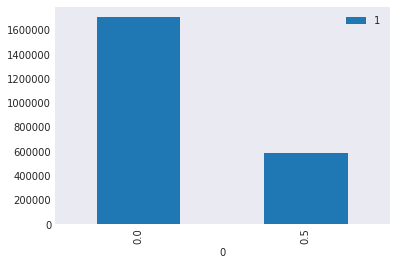

In [102]:
# histogram of target variable
hist_c1 = train_sample.select('_1').rdd.flatMap(lambda x: x).histogram(2)
pd.DataFrame(list(zip(*hist_c1))).set_index(0).plot(kind='bar');

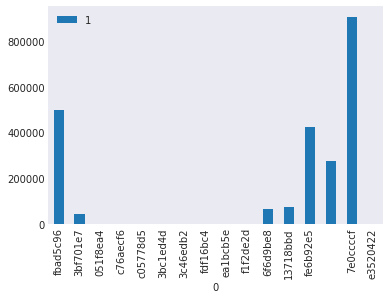

In [96]:
# histogram of column 20
hist_c20 = train_sample.groupBy('_20').count().collect()
pd.DataFrame(list(zip(*hist_c20))).T.set_index(0).plot(kind='bar')

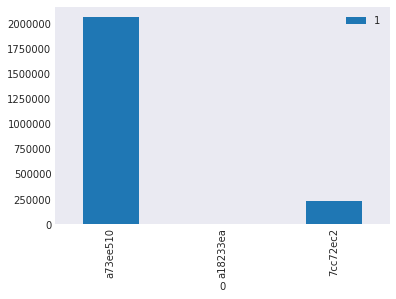

In [99]:
# histogram of column 23
hist_c23 = train_sample.groupBy('_23').count().collect()
pd.DataFrame(list(zip(*hist_c23))).T.set_index(0).plot(kind='bar')

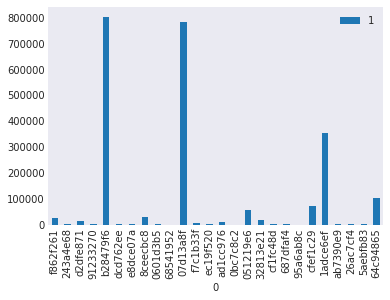

In [100]:
# histogram of column 28
hist_c28 = train_sample.groupBy('_28').count().collect()
pd.DataFrame(list(zip(*hist_c28))).T.set_index(0).plot(kind='bar')

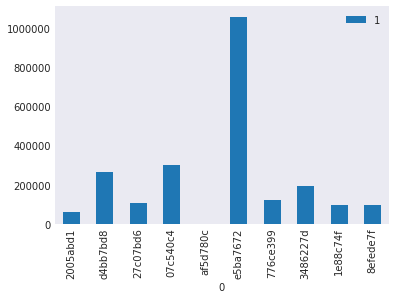

In [101]:
# histogram of column 31
hist_c31 = train_sample.groupBy('_31').count().collect()
pd.DataFrame(list(zip(*hist_c31))).T.set_index(0).plot(kind='bar')

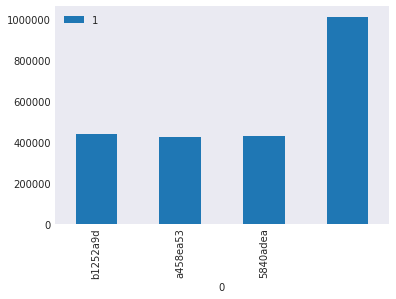

In [142]:
# histogram of column 34
hist_c34 = train_sample.groupBy('_34').count().collect()
pd.DataFrame(list(zip(*hist_c34))).T.set_index(0).plot(kind='bar')

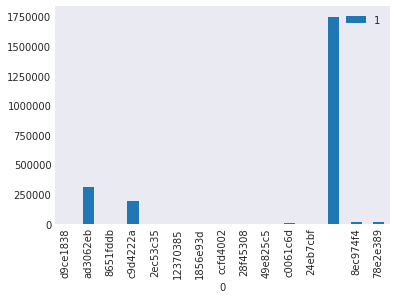

In [95]:
# histogram of column 36
hist_c36 = train_sample.groupBy('_36').count().collect()
pd.DataFrame(list(zip(*hist_c36))).T.set_index(0).plot(kind='bar')

### Estimates of ctr based on category

[Text(0,0,'fbad5c96'),
 Text(0,0,'3bf701e7'),
 Text(0,0,'051f8ea4'),
 Text(0,0,'c76aecf6'),
 Text(0,0,'c05778d5'),
 Text(0,0,'3bc1ed4d'),
 Text(0,0,'3c46edb2'),
 Text(0,0,'fdf16bc4'),
 Text(0,0,'ea1bcb5e'),
 Text(0,0,'f1f2de2d'),
 Text(0,0,'6f6d9be8'),
 Text(0,0,'13718bbd'),
 Text(0,0,'fe6b92e5'),
 Text(0,0,''),
 Text(0,0,'7e0ccccf'),
 Text(0,0,'e3520422')]

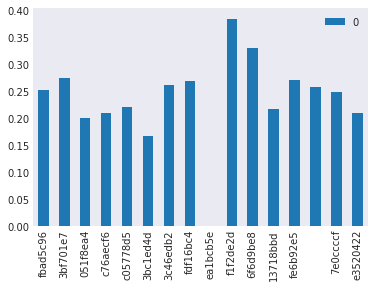

In [138]:
# for column 20
list_labls_vals = list(zip(*train_sample.groupBy('_20').sum('_1').collect()))
labls = list_labls_vals[0]
vals = np.array(list_labls_vals[1])/np.array(list(zip(*train_sample.groupBy('_20').count().collect()))[1])

ax = pd.DataFrame(vals).plot(kind='bar')
ax.set_xticklabels(labls)

[Text(0,0,'a73ee510'), Text(0,0,'a18233ea'), Text(0,0,'7cc72ec2')]

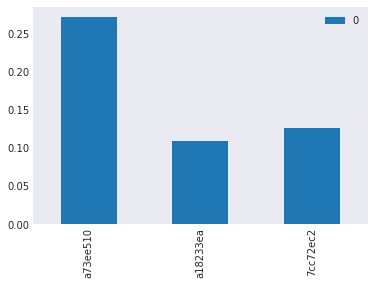

In [137]:
# for column 23
list_labls_vals = list(zip(*train_sample.groupBy('_23').sum('_1').collect()))
labls = list_labls_vals[0]
vals = np.array(list_labls_vals[1])/np.array(list(zip(*train_sample.groupBy('_23').count().collect()))[1])

ax = pd.DataFrame(vals).plot(kind='bar')
ax.set_xticklabels(labls)

[Text(0,0,'f862f261'),
 Text(0,0,'243a4e68'),
 Text(0,0,'d2dfe871'),
 Text(0,0,'91233270'),
 Text(0,0,'b28479f6'),
 Text(0,0,'dcd762ee'),
 Text(0,0,'e8dce07a'),
 Text(0,0,'8ceecbc8'),
 Text(0,0,'0601d3b5'),
 Text(0,0,'68541952'),
 Text(0,0,'07d13a8f'),
 Text(0,0,'f7c1b33f'),
 Text(0,0,'ec19f520'),
 Text(0,0,'ad1cc976'),
 Text(0,0,'0bc7c8c2'),
 Text(0,0,'051219e6'),
 Text(0,0,'32813e21'),
 Text(0,0,'cf1fc48d'),
 Text(0,0,'687dfaf4'),
 Text(0,0,'95a6ab8c'),
 Text(0,0,'cfef1c29'),
 Text(0,0,'1adce6ef'),
 Text(0,0,'ab7390e9'),
 Text(0,0,'26ac7cf4'),
 Text(0,0,'5aebfb83'),
 Text(0,0,'64c94865')]

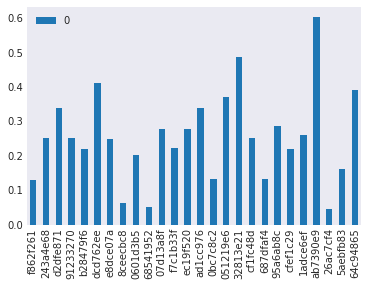

In [139]:
# for column 28
list_labls_vals = list(zip(*train_sample.groupBy('_28').sum('_1').collect()))
labls = list_labls_vals[0]
vals = np.array(list_labls_vals[1])/np.array(list(zip(*train_sample.groupBy('_28').count().collect()))[1])

ax = pd.DataFrame(vals).plot(kind='bar')
ax.set_xticklabels(labls)

[Text(0,0,'2005abd1'),
 Text(0,0,'d4bb7bd8'),
 Text(0,0,'27c07bd6'),
 Text(0,0,'07c540c4'),
 Text(0,0,'af5d780c'),
 Text(0,0,'e5ba7672'),
 Text(0,0,'776ce399'),
 Text(0,0,'3486227d'),
 Text(0,0,'1e88c74f'),
 Text(0,0,'8efede7f')]

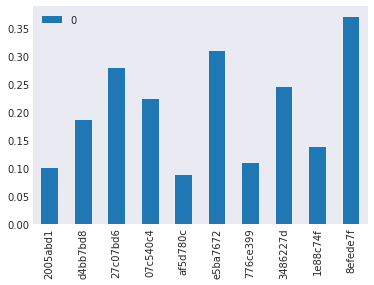

In [141]:
# for column 31
list_labls_vals = list(zip(*train_sample.groupBy('_31').sum('_1').collect()))
labls = list_labls_vals[0]
vals = np.array(list_labls_vals[1])/np.array(list(zip(*train_sample.groupBy('_31').count().collect()))[1])

ax = pd.DataFrame(vals).plot(kind='bar')
ax.set_xticklabels(labls)

[Text(0,0,'b1252a9d'),
 Text(0,0,'a458ea53'),
 Text(0,0,'5840adea'),
 Text(0,0,'')]

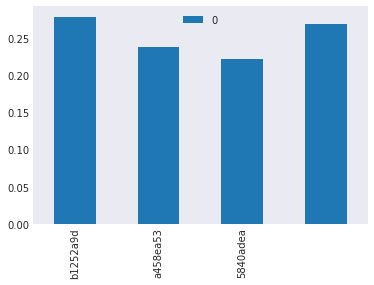

In [143]:
# for column 34
list_labls_vals = list(zip(*train_sample.groupBy('_34').sum('_1').collect()))
labls = list_labls_vals[0]
vals = np.array(list_labls_vals[1])/np.array(list(zip(*train_sample.groupBy('_34').count().collect()))[1])

ax = pd.DataFrame(vals).plot(kind='bar')
ax.set_xticklabels(labls)

[Text(0,0,'d9ce1838'),
 Text(0,0,'ad3062eb'),
 Text(0,0,'8651fddb'),
 Text(0,0,'c9d4222a'),
 Text(0,0,'2ec53c35'),
 Text(0,0,'12370385'),
 Text(0,0,'1856e93d'),
 Text(0,0,'ccfd4002'),
 Text(0,0,'28f45308'),
 Text(0,0,'49e825c5'),
 Text(0,0,'c0061c6d'),
 Text(0,0,'24eb7cbf'),
 Text(0,0,''),
 Text(0,0,'8ec974f4'),
 Text(0,0,'78e2e389')]

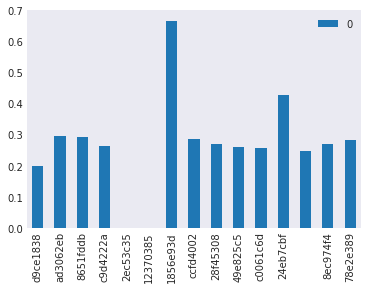

In [144]:
# for column 36
list_labls_vals = list(zip(*train_sample.groupBy('_36').sum('_1').collect()))
labls = list_labls_vals[0]
vals = np.array(list_labls_vals[1])/np.array(list(zip(*train_sample.groupBy('_36').count().collect()))[1])

ax = pd.DataFrame(vals).plot(kind='bar')
ax.set_xticklabels(labls)